целевая функция $$f=Min(30*\displaystyle\sum_{i=1}^{k}{(l+L)_i},12*\displaystyle\sum_{j=1}^{N}{l_j}+N*RP+30*\displaystyle\sum_{i=1}^{k}{L_i})$$

L - растояние от роутера до сервера

l - растояние от компьютера до роутера

N - количиство роутеров

RP - стоимость одного роутера

In [0]:
import numpy as np              
import matplotlib.pyplot as plt 
import math
import random

In [0]:
number_computers = 150  #число ПК
router_price = 3500 #Стоимость роутера
max_router_ports = 8 #Максимально число портов у роутера
TNP = 30
optical_cabel = 12 

In [0]:
def calculation_without_router (min_distance, TNP):    
    return (TNP*np.sum(min_distance))

In [0]:
def calculation_with_router(distance, TNP, optical_cabel, router_price, dist_server, num_router):
    return (optical_cabel*dist_server+router_price*num_router+TNP*np.sum(distance))

In [0]:
distance_to_server = np.array(range (50,270))

In [0]:
num_router = number_computers // max_router_ports if number_computers % max_router_ports == 0 else \
         number_computers // max_router_ports +1
f_summ=[]
o_summ = []
for i in distance_to_server:
    d_to_sr= np.random.randint(i ,i+50,number_computers)
    distance = np.random.randint(2, 15, number_computers)
    dist_server = d_to_sr - distance
    without = calculation_without_router(d_to_sr, TNP)
    o_summ.append(without)
    with_router = calculation_with_router(distance, TNP, optical_cabel, router_price, dist_server, num_router)
    f_summ.append(np.minimum(without, with_router))

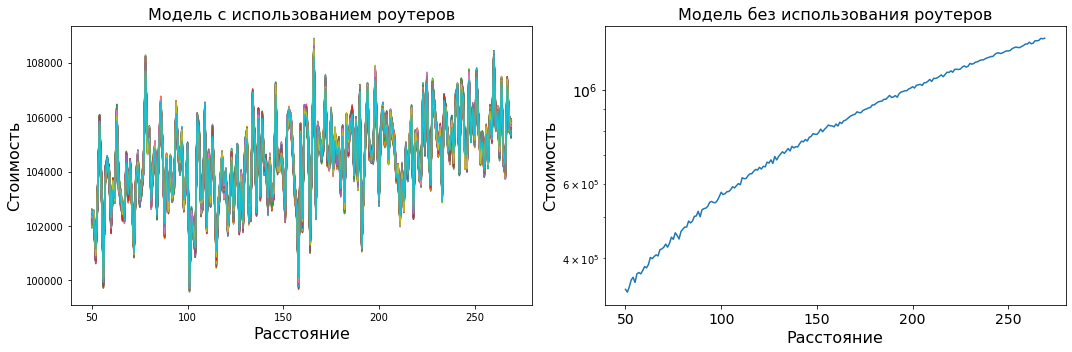

In [16]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))                                                                                                         
ax1.plot(distance_to_server,f_summ)
ax1.set_title('Модель с использованием роутеров',{'size':16})
ax1.set_xlabel('Расстояние',{'size':16})
ax1.set_ylabel('Стоимость',{'size':16})


ax2.plot(distance_to_server,o_summ) 
ax2.set_title('Модель без использования роутеров',{'size':16})
ax2.set_xlabel('Расстояние',{'size':16})
ax2.set_ylabel('Стоимость',{'size':16})
ax2.set_yscale('log')
    
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.show()  